In [4]:
from glob import glob
from natsort import natsorted
import functions as ft
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [2]:
dir = r"Z:\KIDonSun\experiments\Entropy ADR\LT402chip1_BF_20251031\LaserOff_10kids_3Preads\TD_Power/"
files = natsorted(glob(dir + '*TDvis0*.bin'))[::3]
dir = r"Z:\KIDonSun\experiments\Entropy ADR\LT402chip1_BF_20251120_nibbled\15KIDs laser off\TD_Power/"
files_trim = natsorted(glob(dir + '*TDvis0*.bin'))[::3]
dir = r"Z:\KIDonSun\experiments\Entropy ADR\LT402chip1_BF_20251203_withLenses\15KIDs_3Preads_LaserOff\TD_Power/"
files_lens = natsorted(glob(dir + '*TDvis0*.bin'))[::3]


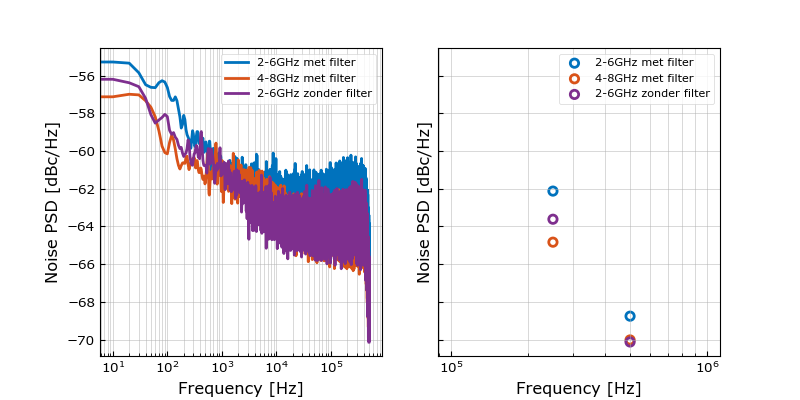

In [3]:
fig, axes = plt.subplot_mosaic('ab', sharey=True, figsize=(8,4))
for i, file in enumerate(files):
    fxx, nxx = ft.get_noise_psd(file, wl=100000)
    if not i:
        navg = nxx
        args = np.linspace(0, len(fxx)-1, 3, dtype=int)
    else:
        navg += nxx
    # axes['a'].semilogx(fxx, 10*np.log10(nxx), c='b', alpha=0.2)
    # axes['b'].scatter(fxx[args], 10*np.log10(nxx[args]), facecolor='None', edgecolor='b', lw=2, alpha=0.1)
for i, file in enumerate(files_trim):
    fxx, nxx = ft.get_noise_psd(file, wl=100000)
    if not i:
        navg_trim = nxx
    else:
        navg_trim += nxx
    # axes['a'].semilogx(fxx, 10*np.log10(nxx), c='o', alpha=0.2)
    # axes['b'].scatter(fxx[args], 10*np.log10(nxx[args]), facecolor='None', edgecolor='o', lw=2, alpha=0.1)
for i, file in enumerate(files_lens):
    fxx, nxx = ft.get_noise_psd(file, wl=100000)
    if not i:
        navg_lens = nxx
    else:
        navg_lens += nxx
    # axes['a'].semilogx(fxx, 10*np.log10(nxx), c='p', alpha=0.2)
    # axes['b'].scatter(fxx[args], 10*np.log10(nxx[args]), facecolor='None', edgecolor='p', lw=2, alpha=0.1)
ax = axes['a']
ax.semilogx(fxx, 10*np.log10(navg/len(files)), c='b', lw=2, label='before trimming')
ax.semilogx(fxx, 10*np.log10(navg_trim/len(files_trim)), c='o', lw=2, label='after trimming')
ax.semilogx(fxx, 10*np.log10(navg_lens/len(files_lens)), c='p', lw=2, label='after lenses')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Noise PSD [dBc/Hz]')
ax.legend()
ax = axes['b']
ax.scatter(fxx[args], 10*np.log10(navg[args]/len(files)), facecolor='None', edgecolor='b', lw=2, alpha=1, label='before trimming')
ax.scatter(fxx[args], 10*np.log10(navg_trim[args]/len(files_trim)), facecolor='None', edgecolor='o', lw=2, alpha=1, label='after trimming')
ax.scatter(fxx[args], 10*np.log10(navg_lens[args]/len(files_lens)), facecolor='None', edgecolor='p', lw=2, alpha=1, label='after lenses')
ax.set_xscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Noise PSD [dBc/Hz]')
ax.legend()